In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db = pd.read_csv('./stats/stats.csv')
pd.set_option('display.max.columns', None)
db.head()

,SCORE,ROUNDS,DAMAGE_DEALT,DAMAGE_RECEIVED,HP_REFILLED,SKELETON_A_KILLED,SKELETON_B_KILLED,BAT_KILLED,BRINGER_KILLED,DASHES,JUMPS,TIME_ELAPSED
0,8790,20,96691,1085,840,21,43,20,19,423,323,1993.29
1,7550,18,87502,750,550,19,35,17,17,553,353,1750.85
2,6335,15,74395,495,350,16,30,15,13,336,284,1439.23
3,10035,21,104537,1025,995,25,44,25,21,592,394,2135.82
4,7300,18,73290,405,335,16,29,15,13,325,264,1703.43


<h1>DARK KNIGHT STATISTICS</h1>

<h4>Statistics included:<br>
    <ol>
        <li>Total number of enemies killed compared to time elapsed for each game</li>
        <li>Average number of jumps and dashes grouped by number of rounds (for rounds higher than  or equal to 20)</li>
        <li>Correlation of damage received to damage dealt for (rounds higher than or equal to 20)</li>
    </ol>
</h4>

--------------------------
1. Total number of enemies killed compared to time elapsed for each game

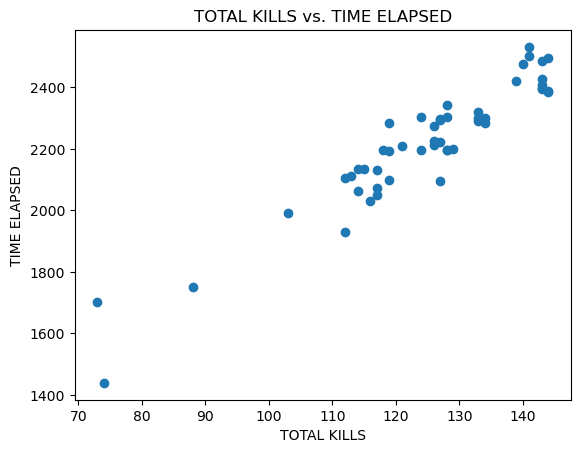

Time elapsed vs. total kills: 0.9476946972613538


In [12]:
db = db.assign(TOTAL_KILLS = db['SKELETON_A_KILLED'] + db['SKELETON_B_KILLED'] + db['BAT_KILLED'] + db['BRINGER_KILLED'])
avg_total_kills = db.groupby(['TOTAL_KILLS']).mean()
avg_total_time = db.groupby(['TIME_ELAPSED']).mean()
plt.scatter(db['TOTAL_KILLS'], db['TIME_ELAPSED'])
plt.xlabel('TOTAL KILLS')
plt.ylabel('TIME ELAPSED')
plt.title('TOTAL KILLS vs. TIME ELAPSED')
plt.show()
corr = db.corrwith(db['TIME_ELAPSED'])['TOTAL_KILLS']
print(f'Time elapsed vs. total kills: {corr}')

From the above graph and correlation value, it is concluded that there is a positive linear correlation between number of total kills to time elapsed. This means that as more time passes in a game, more enemies will be killed by the player.

-----------------
2. Average number of jumps and dashes grouped by number of rounds (for rounds higher than  or equal to 20)

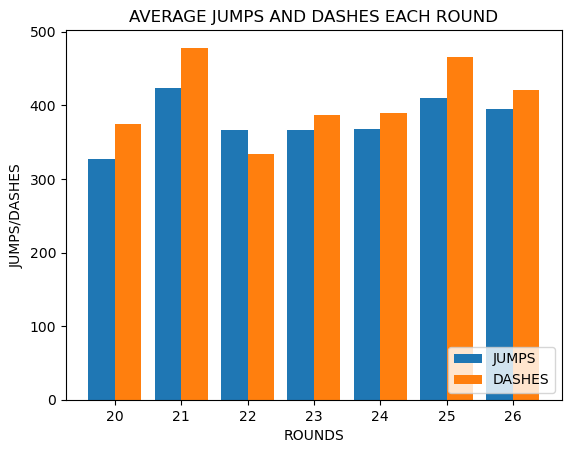

In [13]:
db20 = db[db['ROUNDS'] >= 20]
avgjumps = db20.groupby(['ROUNDS'])['JUMPS'].mean()
avgdashes = db20.groupby(['ROUNDS'])['DASHES'].mean()
cols = len(avgjumps)
rnds = [str(i) for i in avgjumps.index.to_numpy()]
plt.bar(avgjumps.index - 0.2, avgjumps, width=0.4, label = 'JUMPS')
plt.bar(avgdashes.index + 0.2, avgdashes, width=0.4, label = 'DASHES')
plt.xticks(avgjumps.index, rnds)
plt.legend(loc='lower right')
plt.xlabel('ROUNDS')
plt.ylabel('JUMPS/DASHES')
plt.title('AVERAGE JUMPS AND DASHES EACH ROUND')
plt.show()

From the above graph, the average number of jumps and dashes seems inconsistent, with round 22 having the lowest averages for both. Usually, the player will dash more than jumping, except for round 22 which is an outlier.

-----------
3. Correlation of damage received to damage dealt for (rounds higher than or equal to 20)

0.7175895412319993

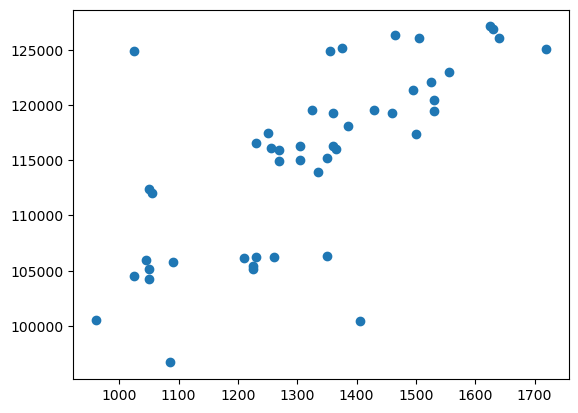

In [14]:
comp = db[db['ROUNDS'] >= 20]
plt.scatter(comp['DAMAGE_RECEIVED'], comp['DAMAGE_DEALT'])
plt.show
comp['DAMAGE_RECEIVED'].corr(comp['DAMAGE_DEALT'])

The damage dealt compared to the damage received is a positive linear correlation, meaning that as the player deals more damage, it is expected that they will receive more damage as well.